# Heart disease Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
%matplotlib inline

## Import Data

In [4]:
df = pd.read_csv("framingham.csv")

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Check overall Informations about the Dataset

In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

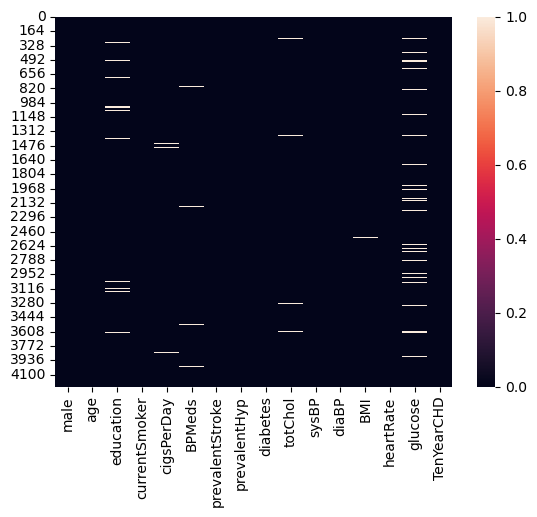

In [8]:
sns.heatmap(df.isnull())

<Axes: >

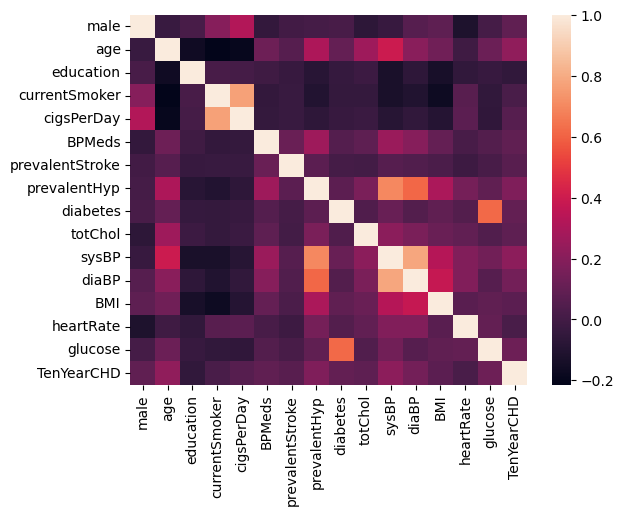

In [9]:
sns.heatmap(df.corr())

In [10]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Data Cleaning

### Education

In [11]:
df.education.value_counts()

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

In [12]:
df.education.fillna(1.0,inplace=True)

In [13]:
df.education.isna().sum()

0

### cigsPerDay

In [14]:
df.cigsPerDay.value_counts()

cigsPerDay
0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [15]:
mean = df.cigsPerDay.mean()

df.cigsPerDay.fillna(mean,inplace=True)

In [16]:
df.cigsPerDay.isnull().sum()

0

### BPMeds

In [17]:
df.BPMeds.value_counts()

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

In [18]:
df.BPMeds.isna().sum()

53

In [19]:
df.BPMeds.fillna(0.0,inplace=True)

In [20]:
df.BPMeds.isna().sum()

0

### totChol

In [21]:
df.totChol.isna().sum()

50

In [22]:
df.totChol.value_counts()

totChol
240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: count, Length: 248, dtype: int64

In [23]:
mean_1 = df.totChol.mean()

df.totChol.fillna(mean_1,inplace = True)

In [24]:
df.totChol.isna().sum()

0

### BMI

In [25]:
df.BMI.isna().sum()

19

In [26]:
df.BMI.value_counts()

BMI
22.19    18
22.54    18
23.48    18
22.91    18
23.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: count, Length: 1363, dtype: int64

In [27]:
mean_2 = df.BMI.mean()

df.BMI.fillna(mean_2,inplace = True)

In [28]:
df.BMI.isna().sum()

0

### heartRate

In [29]:
df.heartRate.isna().sum()

1

In [30]:
df.heartRate.value_counts()

heartRate
75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: count, Length: 73, dtype: int64

In [31]:
mean_3 = df.heartRate.mean()

df.heartRate.fillna(mean_3,inplace=True)

In [32]:
df.heartRate.isna().sum()

0

### Glucose

In [33]:
df.glucose.isna().sum()

388

In [34]:
df.glucose.value_counts()

glucose
75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: count, Length: 143, dtype: int64

In [35]:
mean_4 = df.glucose.mean()

df.glucose.fillna(mean_4,inplace=True)

In [36]:
df.glucose.isna().sum()

0

In [37]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Data Cleaned!**

## Data Analysis & Preprocessing

In [38]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
df.currentSmoker.value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

0 means **Non-Smoker**

1 means **Smoker**

In [40]:
data = df.loc[:, ['male', 'education','currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'TenYearCHD']]
data.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0


In [41]:
data_new = pd.get_dummies(data)
data_new

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4233,1,1.0,1,0.0,0,1,0,1
4234,1,3.0,1,0.0,0,0,0,0
4235,0,2.0,1,0.0,0,0,0,0
4236,0,1.0,1,0.0,0,0,0,0


In [42]:
data_new = data.astype(str)

In [43]:
data_new = pd.get_dummies(data_new)
data_new.head()

,male_0,male_1,education_1.0,education_2.0,education_3.0,education_4.0,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD_0,TenYearCHD_1
0,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False
1,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False
2,False,True,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False
3,True,False,False,False,True,False,False,True,True,False,True,False,False,True,True,False,False,True
4,True,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False


In [44]:
data_new.drop('TenYearCHD_0',axis = 1,inplace=True)
data_new.head()

,male_0,male_1,education_1.0,education_2.0,education_3.0,education_4.0,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD_1
0,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,False
1,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False
2,False,True,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False
3,True,False,False,False,True,False,False,True,True,False,True,False,False,True,True,False,True
4,True,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,False


## StandardScaler

In [45]:
data_scalar = df.drop(['male', 'education','currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'TenYearCHD'],axis = 1)
data_scalar.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


In [46]:
data_scalar.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaler.fit(data_scalar)

StandardScaler()

In [49]:
scaled_inputs = scaler.transform(data_scalar)

In [50]:
scaled_inputs

array([[-1.23495068, -0.75797428, -0.94134554, ...,  0.28694273,
         0.34274444, -0.21751656],
       [-0.41825733, -0.75797428,  0.29959495, ...,  0.71932499,
         1.59027451, -0.26131108],
       [-0.18491638,  0.92583516,  0.18678218, ..., -0.11350221,
        -0.07309892, -0.52407818],
       ...,
       [-0.18491638,  0.92583516,  0.25446984, ..., -0.93404582,
         0.67541912,  0.17663409],
       [-0.65159829,  0.5048828 , -0.60290723, ..., -1.63175357,
         0.84175647,  0.        ],
       [ 0.28176554, -0.75797428,  0.72828348, ..., -1.06425185,
         0.34274444,  1.09631895]])

In [51]:
data_scalar_new = pd.DataFrame()

In [52]:
data_scalar_new[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']] = scaled_inputs

In [53]:
data_scalar_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234951,-0.757974,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517
1,-0.418257,-0.757974,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311
2,-0.184916,0.925835,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078
3,1.331800,1.767740,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141
4,-0.418257,1.178407,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840


In [54]:
final_data = pd.concat([data_scalar_new,data_new],axis = 1)
final_data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0,male_1,...,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD_1
0,-1.234951,-0.757974,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,False,True,...,False,True,False,True,False,True,False,True,False,False
1,-0.418257,-0.757974,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,True,False,...,False,True,False,True,False,True,False,True,False,False
2,-0.184916,0.925835,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,False,True,...,True,True,False,True,False,True,False,True,False,False
3,1.331800,1.767740,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141,True,False,...,True,True,False,True,False,False,True,True,False,True
4,-0.418257,1.178407,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840,True,False,...,True,True,False,True,False,True,False,True,False,False


In [55]:
final_data.rename({'TenYearCHD_1':'target'}, axis =1, inplace =True)

In [56]:
final_data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0,male_1,...,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,target
0,-1.234951,-0.757974,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,False,True,...,False,True,False,True,False,True,False,True,False,False
1,-0.418257,-0.757974,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,True,False,...,False,True,False,True,False,True,False,True,False,False
2,-0.184916,0.925835,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,False,True,...,True,True,False,True,False,True,False,True,False,False
3,1.331800,1.767740,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141,True,False,...,True,True,False,True,False,False,True,True,False,True
4,-0.418257,1.178407,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840,True,False,...,True,True,False,True,False,True,False,True,False,False


In [57]:
target = final_data['target']
target.value_counts()

target
False    3594
True      644
Name: count, dtype: int64

Yes the model is severly imbalanced. Lets use smote() to resolve this.

We can apply smote() only after splitting the dataset. Because, its a transformation, and we need to be careful of dataleak.

## Model's X and y

In [58]:
X = final_data.drop('target',axis = 1)
y = final_data['target']

### Split X and y to Test & Train

In [59]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)

## Install Scikit-learn

In [64]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


## Install imblearn

In [65]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [66]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train,y_train)

## Model - Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [86]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [87]:
prediction = model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8525943396226415

In [92]:
conf_mat = confusion_matrix(y_test,prediction)
conf_mat

array([[712,   5],
       [120,  11]], dtype=int64)

**TRUE POSITIVE**  = 712

**FALSE POSITIVE** = 5

**FALSE NEGATIVE** = 120

**FALSE POSITIVE** = 11

## Model - XGBoost

In [89]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.2/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.5/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.6/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.7/99.8 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.8/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.8/99.8 MB 2.0 MB/s eta 0:00:50
   ---------------------------

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [95]:
model_xgb = XGBClassifier()

model_xgb.fit(X_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
prediction_xgb = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test,prediction_xgb)

conf_mat = confusion_matrix(y_test,prediction_xgb)

print("Accuracy: ",accuracy)

print("Confusion Matrix:\n",conf_mat)

Accuracy:  1.0
Confusion Matrix:
 [[717   0]
 [  0 131]]


**TRUE POSITIVE**  = 717

**FALSE POSITIVE** = 0

**FALSE NEGATIVE** = 0

**FALSE POSITIVE** = 131

We can say that XGB Model Gave better Predicitions than Logisitic Regression Model(1>0.85).But having Accuracy of 1 is unreal, which says that XGBoost is not very suitable to this model